# Experimento de Rutherford

In [1]:
from ExperimentoRutherford import ExperimentoNumerico

import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import time
import math

## Parámetros de la función ExperimentoNumerico

<b>N</b> <br>
Número de partículas a simular en el experimento.

<b>cpus(Parametro opcional)</b> <br>
Número de nucleos que se usará para el computo. <br>
(Default cpus=2)

<b>tipo_cristal (Parametro opcional)</b><br>
Tipo de cristal cúbico que se usará, disponibles "pc","bcc","fcc"<br>
"pc" : primitive cube <br>
"bcc": body centered cube <br>
"fcc": face centerd cube <br>
Aviso : Por el momento solo se tienen buenos resultados con "fcc" <br>
(Default tipo_cristal="fcc") <br>

<b>z_a (Parametro opcional)</b>         
Número atómico de elemento que conforman el blanco.<br>
La opción de default es para el oro. <br> 
(Default: z_a = 79) <br>

<b>num_laminas (Parametro opcional)</b><br>
Número de láminas que compone al blanco. Cada lámina tiene 200 átomos de espesor. <br>
(Default: num_laminas=2)

<b> atom_radius (Parametro opcional)</b><br>
Radio átomico del elemento que compone las laminas.<bt>
El valor por default corresponde al del oro.<br>
(Dafault: atom_radius = 1.44e-10)<br>
    
<b>diámetro_celda</b><br>
Díametro de la celda unitaria.<br>
El valor por default corresponde al del oro.<br>
(Default:diámetro_celda4.07e-10)<br>

<b>velocidad_inicial</b><br>
Velocidad inicial de las partículas alfa.<br>
(Default:velocidad_inicial=1.57e7)<br>

<b>max_deslocacion</b><br>
Añade aleatoridad a las posiciones de los átomos en la red cristalina.<br>Un valor mayor corresponde a la posibilidad de que el núcleo esté más lejos de su posición predeterminada. Se recomienda un valor de 0.5. <br>
(Default:max_deslocacion= 0.5) 


## Experimento Angulos más Probables

In [2]:
print("Aviso\nTiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.\n")

cpus            = 6
max_deslocacion = 0.5

experimento_laminas = [0.2,0.5,0.8,2,12,20,40,100,80]

num_experimento = 0
resultados      = []
angulos         = []
rebotes         = []

for num_laminas in experimento_laminas:
    num_experimento += 1
    print(f"Iniciando experimento {num_experimento} ...")
    inicio = time.time()
    output = ExperimentoNumerico(N=30_000,
                                 tipo_cristal="fcc",
                                 cpus=cpus,
                                 num_laminas=num_laminas,
                                 max_deslocacion = max_deslocacion)
    resultados.append(output["datos"])
    x = output["datos"][:,0]
    y = output["datos"][:,1]
    z = output["datos"][:,2]
    pos      = output["datos"][:,0:3]
    pp       = np.sum(pos*np.array([0,1,0]),axis=1)
    angulos.append(np.arccos(pp)*180 / math.pi)
    final   = time.time()
    tiempo   = round(final-inicio,2)
    print(f"Experimento {num_experimento} tardo {tiempo} s en completarse")

print("\nCalculo numérico terminado !")



Aviso
Tiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.

Iniciando experimento 1 ...
Experimento 1 tardo 1.41 s en completarse
Iniciando experimento 2 ...
Experimento 2 tardo 2.89 s en completarse
Iniciando experimento 3 ...
Experimento 3 tardo 4.35 s en completarse
Iniciando experimento 4 ...
Experimento 4 tardo 10.49 s en completarse
Iniciando experimento 5 ...
Experimento 5 tardo 60.43 s en completarse
Iniciando experimento 6 ...
Experimento 6 tardo 101.52 s en completarse
Iniciando experimento 7 ...
Experimento 7 tardo 206.74 s en completarse
Iniciando experimento 8 ...
Experimento 8 tardo 540.05 s en completarse
Iniciando experimento 9 ...
Experimento 9 tardo 426.29 s en completarse

Calculo numérico terminado !


In [ ]:
# GRAFICA 1 : Histograma muy pocas láminas.

graficar_experimento = [0,1,2]
lista_max_ang        = []
for num_experimento in graficar_experimento:
    num_laminas = experimento_laminas[num_experimento]
    n,bins,_ = plt.hist(angulos[num_experimento],
                        bins=60,
                        density=True,
                        range=(0,2),
                        alpha=0.5,
                        label=f"{num_laminas} laminas")
    index   = np.argmax(n)
    max_ang = bins[index]
    lista_max_ang.append(max_ang)

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

In [ ]:
##### GRAFICA 2 : Histograma muchas láminas.

graficar_experimento = [3,4,5,6,7,8]
for num_experimento in graficar_experimento:
    num_laminas = experimento_laminas[num_experimento]
    n,bins,_ = plt.hist(angulos[num_experimento],
                        bins=60,
                        density=True,
                        range=(0,20),
                        alpha=0.5,
                        label=f"{num_laminas} laminas")
    index   = np.argmax(n)
    max_ang = bins[index]
    lista_max_ang.append(max_ang)

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

In [ ]:
# GRAFICA 3 : GRAFICA ÁNGULOS MÁS PROBABLES.

experimento_laminas_cm = np.copy(np.array(experimento_laminas))*0.038
plt.plot(experimento_laminas_cm,lista_max_ang,".",c="firebrick",markersize=15)
plt.xlabel("Grosor del blanco en cm de aire")
plt.ylabel("Ángulo de dispersión más probable.")
#X = np.arange(0,100*0.038,0.01)
#Y = 0.8*np.sqrt(X*0.038)
#plt.plot(X,Y,"--",alpha=0.6)

##  Experimento Numéro de Partículas Rebotadas 

Aviso
Tiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.

Iniciando experimento 1 ...
Experimento 1 tardo 9.45 s en completarse
Iniciando experimento 2 ...
Experimento 2 tardo 18.32 s en completarse
Iniciando experimento 3 ...
Experimento 3 tardo 28.19 s en completarse
Iniciando experimento 4 ...
Experimento 4 tardo 35.86 s en completarse
Iniciando experimento 5 ...
Experimento 5 tardo 45.44 s en completarse
Iniciando experimento 6 ...
Experimento 6 tardo 52.72 s en completarse
Iniciando experimento 7 ...
Experimento 7 tardo 66.73 s en completarse
Iniciando experimento 8 ...
Experimento 8 tardo 79.49 s en completarse

Calculo numérico terminado !


Text(0, 0.5, 'Partículas reflectadas')

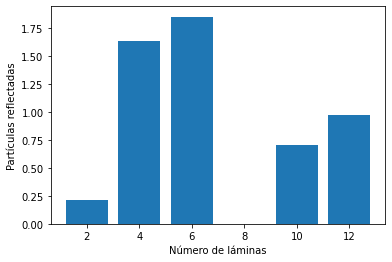

In [10]:
print("Aviso\nTiempo aproximado  de los experimentos entre 5 a 15 minutos dependiendo de la maquina y los cpus ocupados.\n")

cpus            = 8
max_deslocacion = 0.5

experimento_laminas = [10,12,14,16]

num_experimento = 0
resultados      = []
angulos         = []
rebotes         = []

for num_laminas in experimento_laminas:
    num_experimento += 1
    print(f"Iniciando experimento {num_experimento} ...")
    inicio = time.time()
    output = ExperimentoNumerico(N=30_000,
                                 tipo_cristal="fcc",
                                 cpus=cpus,
                                 num_laminas=num_laminas,
                                 max_deslocacion = max_deslocacion)
    resultados.append(output["datos"])
    x = output["datos"][:,0]
    y = output["datos"][:,1]
    z = output["datos"][:,2]
    pos      = output["datos"][:,0:3]
    pp       = np.sum(pos*np.array([0,1,0]),axis=1)
    angulos.append(np.arccos(pp)*180 / math.pi)
    final   = time.time()
    tiempo   = round(final-inicio,2)
    print(f"Experimento {num_experimento} tardo {tiempo} s en completarse")

print("\nCalculo numérico terminado !")

# Contamos las partículas rebotadas.
for experimento in resultados:
    y           = experimento[:,1]
    num_rebotes = y[y < 0]
    num_rebotes = np.sum(num_rebotes)
    rebotes.append(num_rebotes)

# Plot
a = experimento_laminas[:-2]
b = rebotes[:-2]
b = [abs(c) for c in b]
a = [str(c) for c in a]
plt.bar(a,b)
plt.xlabel("Número de láminas")
plt.ylabel("Partículas reflectadas")

## Experimento a distintas velocidad de la partícula alfa.

In [ ]:
cpus = 6
max_deslocacion = 0.5
vel_base    = 1.57e7  
num_laminas = 6
velocidades = [0.4,0.6,0.8,1.0,1.2,1.4]

num_experimento = 0
resultados      = []
angulos         = []

for velocidad_inicial in velocidades:
    num_experimento += 1
    print(f"Iniciando experimento {num_experimento} ...")
    inicio = time.time()
    output = ExperimentoNumerico(N               = 30_000,
                                 tipo_cristal    = "fcc",
                                 cpus            = cpus,
                                 num_laminas     = num_laminas,
                                 max_deslocacion = max_deslocacion,
                                 vel_inicial     = velocidad_inicial*vel_base)
    resultados.append(output["datos"])
    x = output["datos"][:,0]
    y = output["datos"][:,1]
    z = output["datos"][:,2]
    pos      = output["datos"][:,0:3]
    pp       = np.sum(pos*np.array([0,1,0]),axis=1)
    angulos.append(np.arccos(pp)*180 / math.pi)
    final   = time.time()
    tiempo   = round(final-inicio,2)
    print(f"Experimento {num_experimento} tardo {tiempo} s en completarse")

print("\nCalculo numérico terminado !")

In [ ]:
graficar_experimento = [0,1,2,3,4,5]
lista_max_ang        = []
for num_experimento in graficar_experimento:
    vel_inicial = velocidades[num_experimento]
    n,bins,_    = plt.hist(angulos[num_experimento],
                        bins=60,
                        density=True,
                        range=(0,15),
                        alpha=0.5,
                        label=f"{vel_inicial} velocidad original")
    index   = np.argmax(n)
    max_ang = bins[index]
    lista_max_ang.append(max_ang)

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

In [ ]:

plt.plot(velocidades,lista_max_ang,".",c="darkblue",markersize=15)
plt.xlabel("Velocidad relativa")
plt.ylabel("Ángulo de dispersión más probable.")
#plt.xlim(0,1.4)
